In [33]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [35]:
mnist = tf.keras.datasets.mnist



### Split into training and testing data
x: pixel data, y: classification

In [36]:
(x_train, y_train),(x_test, y_test )= mnist.load_data()   #already splitted data

### Normalize

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [38]:
model = tf.keras.models.Sequential()  #basic sequential models

In [39]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#2 hidden layers
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
#output layers
model.add(tf.keras.layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [59]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0535
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9911 - loss: 0.0285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0237
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0208
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0132
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0118
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0105
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9962 - loss: 0.0111


In [60]:
model.save('handritten.keras')

### Evaluate model

In [61]:
model=  tf.keras.models.load_model('handritten.keras')
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1306
0.11476169526576996
0.9769999980926514


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This digit is probably a 6


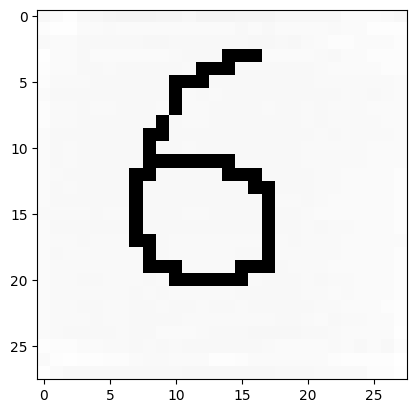

In [65]:
image_path = "digits/image5.png"

# Read grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Invert (white background, black text)
img = np.invert(img)

# Normalize
img = img / 255.0

# Reshape for the model (batch_size=1)
img_input = img.reshape(1, 28, 28)

# Predict
prediction = model.predict(img_input)

print(f"This digit is probably a {np.argmax(prediction)}")

plt.imshow(img, cmap=plt.cm.binary)
plt.show()